In [1]:
import pandas as pd
import numpy as np
import arviz as az

In [2]:
df_india = pd.read_excel(r'alldatasets.xlsx',sheet_name='India')

In [3]:
df_india.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,timeschool,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn,earn_usd
0,IN011004,India,164.000000,1.0,10.0,0.402029,10.0,13.0,0.0,1,95,4,0.458333,5,1,6000,98.376785
1,IN011006,India,158.199997,0.0,10.0,0.143023,30.0,12.0,0.0,0,95,4,0.097222,5,1,32000,524.676147
2,IN011012,India,157.199997,0.0,16.5,0.276244,10.0,5.0,10.0,0,101,6,0.722222,2,1,0,0.000000
3,IN011013,India,169.500000,0.0,11.0,0.252178,5.0,NaN,12.0,1,98,2,0.814815,5,1,9000,147.565170
4,IN011014,India,162.199997,0.0,7.0,0.394253,NaN,7.0,16.5,0,100,4,0.796296,2,1,72000,1180.521362


In [4]:
df_india.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'timeschool', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1',
       'hhsizer1', 'wi_newr1', 'job_cat', 'pvt_sector', 'earn', 'earn_usd'],
      dtype='object')

In [5]:
from scipy import stats
import scipy.stats as stats

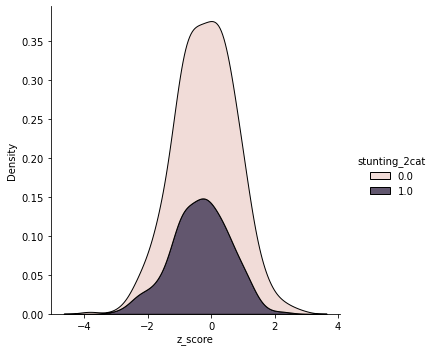

In [6]:
import seaborn as sns
sns.displot(df_india, x="z_score", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [7]:
Y = df_india[['height']]
X = df_india[['stunting_2cat']]

In [8]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat'

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=158.8, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=6.8)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_india, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 23 seconds.


In [11]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,161.908,0.543,160.859,162.890,0.009,0.006,4058.0,4058.0,4066.0,3568.0,1.0
stunting_2cat,-3.961,0.901,-5.639,-2.275,0.014,0.010,3975.0,3975.0,3975.0,3725.0,1.0
sd,9.857,0.308,9.286,10.434,0.004,0.003,4741.0,4736.0,4745.0,3231.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

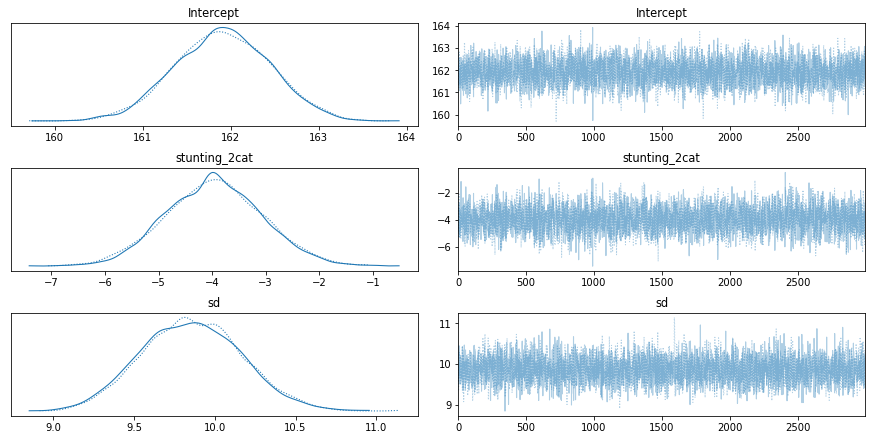

In [12]:
az.plot_trace(normal_trace)

In [13]:
Y = df_india['height']
X = df_india[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [14]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=158.8, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=6.8),
        'agegapr1': pm.Normal.dist(mu=1, sigma=6.8),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=6.8),
        'chsexr1': pm.Normal.dist(mu=1, sigma=6.8),
        'agemonr1': pm.Normal.dist(mu=1, sigma=6.8),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=6.8),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=6.8)
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_india, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=1800, chains = 2, tune = 1500,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 1_500 tune and 1_800 draw iterations (3_000 + 3_600 draws total) took 74 seconds.


In [17]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,146.493,5.658,136.141,157.149,0.112,0.079,2544.0,2543.0,2546.0,2240.0,1.0
stunting_2cat,-3.935,0.543,-4.975,-2.923,0.009,0.007,3452.0,3390.0,3461.0,1921.0,1.0
agegapr1,-0.196,0.085,-0.353,-0.035,0.001,0.001,4170.0,3519.0,4201.0,2556.0,1.0
momeduyrsr1,0.288,0.102,0.095,0.479,0.002,0.001,3578.0,3416.0,3559.0,2748.0,1.0
chsexr1,14.970,0.526,14.029,15.963,0.008,0.006,4410.0,4409.0,4411.0,2464.0,1.0
agemonr1,0.043,0.059,-0.064,0.153,0.001,0.001,2512.0,1898.0,2520.0,2330.0,1.0
wi_newr1,5.088,1.580,2.254,8.213,0.026,0.019,3569.0,3311.0,3571.0,2264.0,1.0
hhsizer1,0.233,0.128,-0.015,0.469,0.002,0.001,4539.0,3742.0,4530.0,2361.0,1.0
sd,5.938,0.185,5.592,6.296,0.003,0.002,4596.0,4556.0,4615.0,2520.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

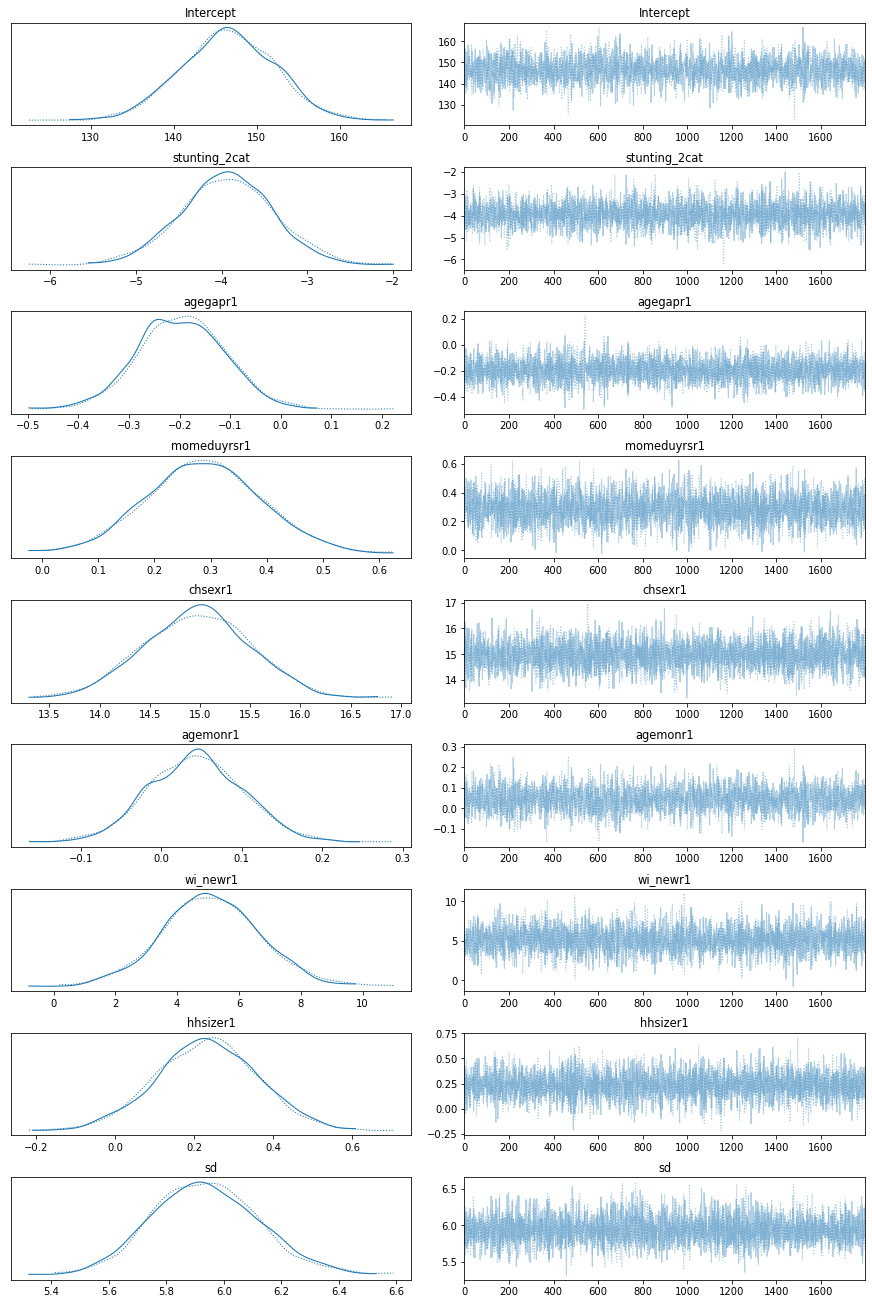

In [18]:
az.plot_trace(normal_trace)

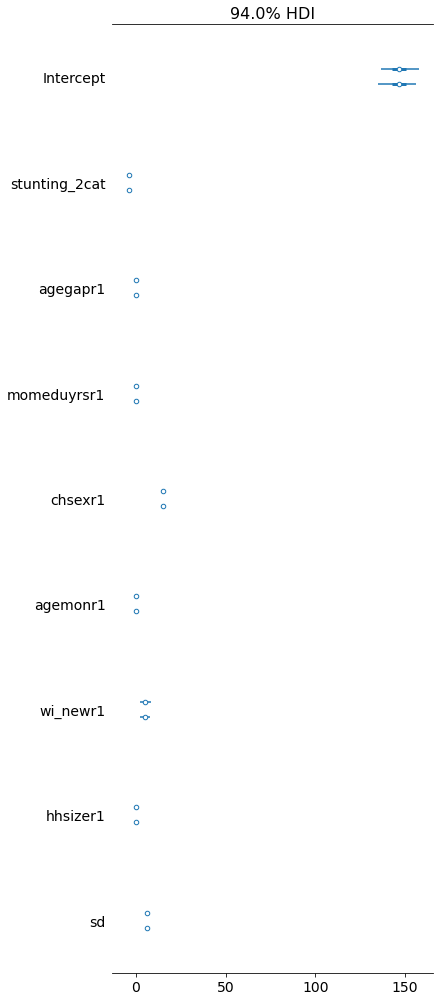

In [19]:
az.plot_forest(normal_trace);